In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Обзор датасета
- Посмотрим на сам датасет
- Посмотрим на характеристики признаков
- Визуализируем характеристики признаков
- Посмотрим на признаки в 3D

In [19]:
# Получение датасета через pandas
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
# Получение характеристик датасета
stats = df.drop(columns=["Outcome"]).describe()
stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


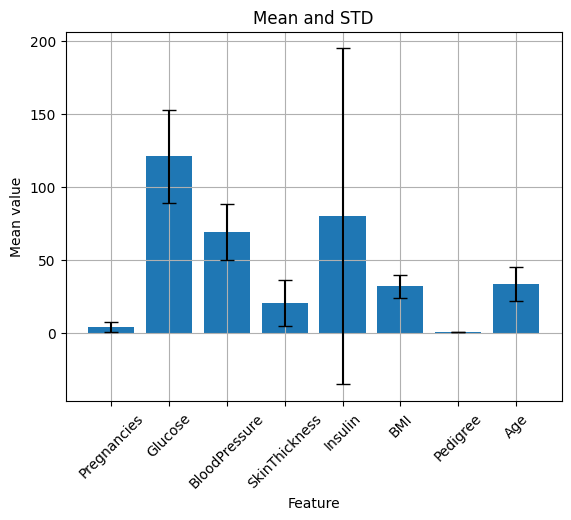

In [21]:
# График среднего значения и отклонения
mean_std_df = stats.loc["mean":"std"].transpose()

labels = mean_std_df.index
means = mean_std_df["mean"]
std = mean_std_df["std"]

plt.bar(labels, means, yerr=std, capsize=5)

plt.grid(True)
plt.title("Mean and STD")
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Mean value")
plt.show()

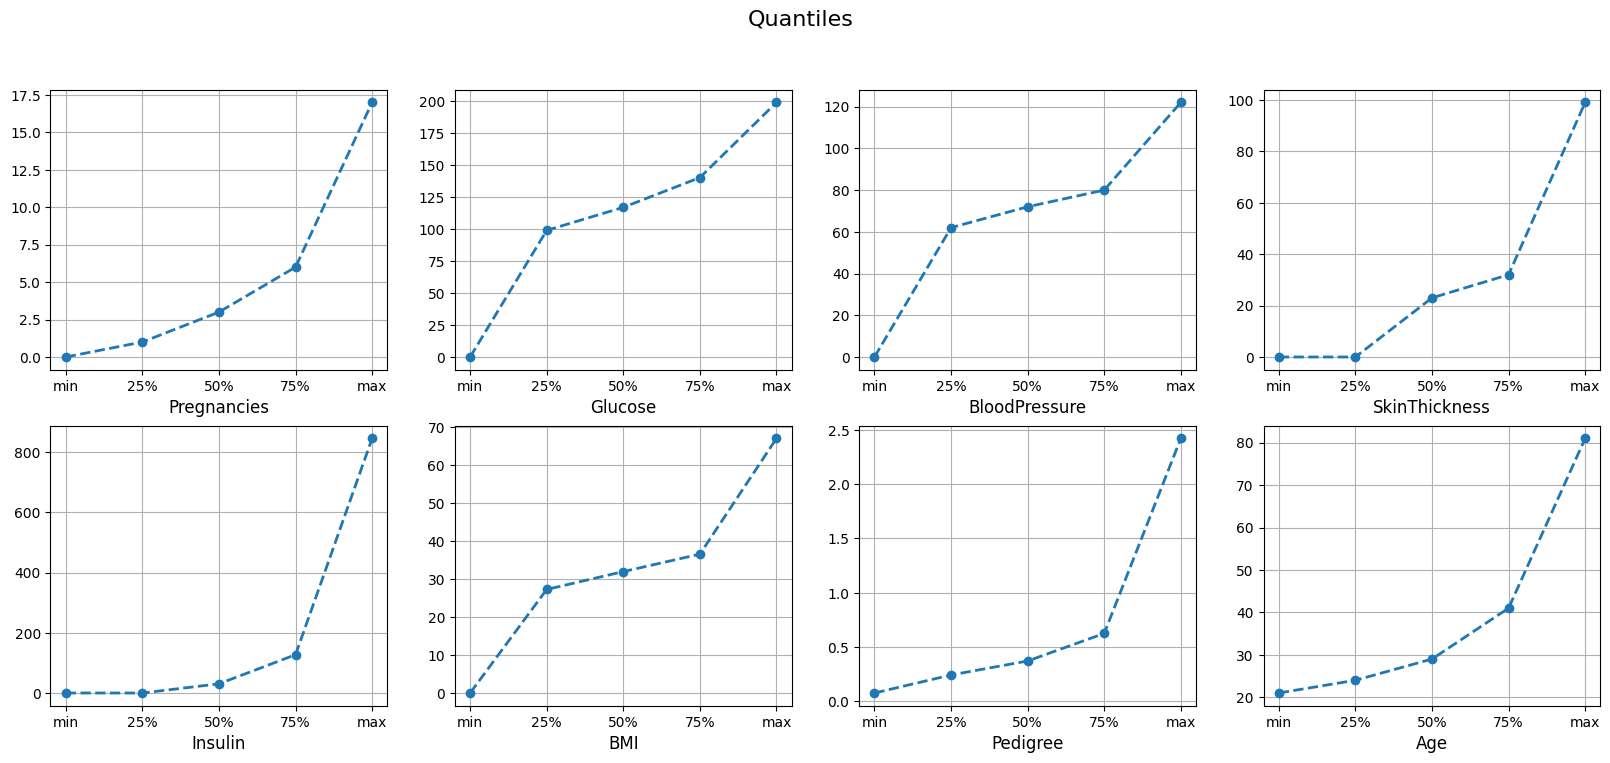

In [22]:
# Графики квантилей
quant_df = stats["min":"max"]
cols = quant_df.columns
x = quant_df.transpose().columns

num_rows = 2
num_cols = len(cols) // num_rows

fig, ax = plt.subplots(num_rows, num_cols)
fig.set_size_inches(20, 8)

count = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax[i][j].plot(x, quant_df[cols[count]], marker='o', linestyle='--', linewidth=2)
        ax[i][j].set_xlabel(cols[count], fontsize=12)
        ax[i][j].grid(True)
        count += 1

fig.suptitle("Quantiles", fontsize=16)
plt.show()


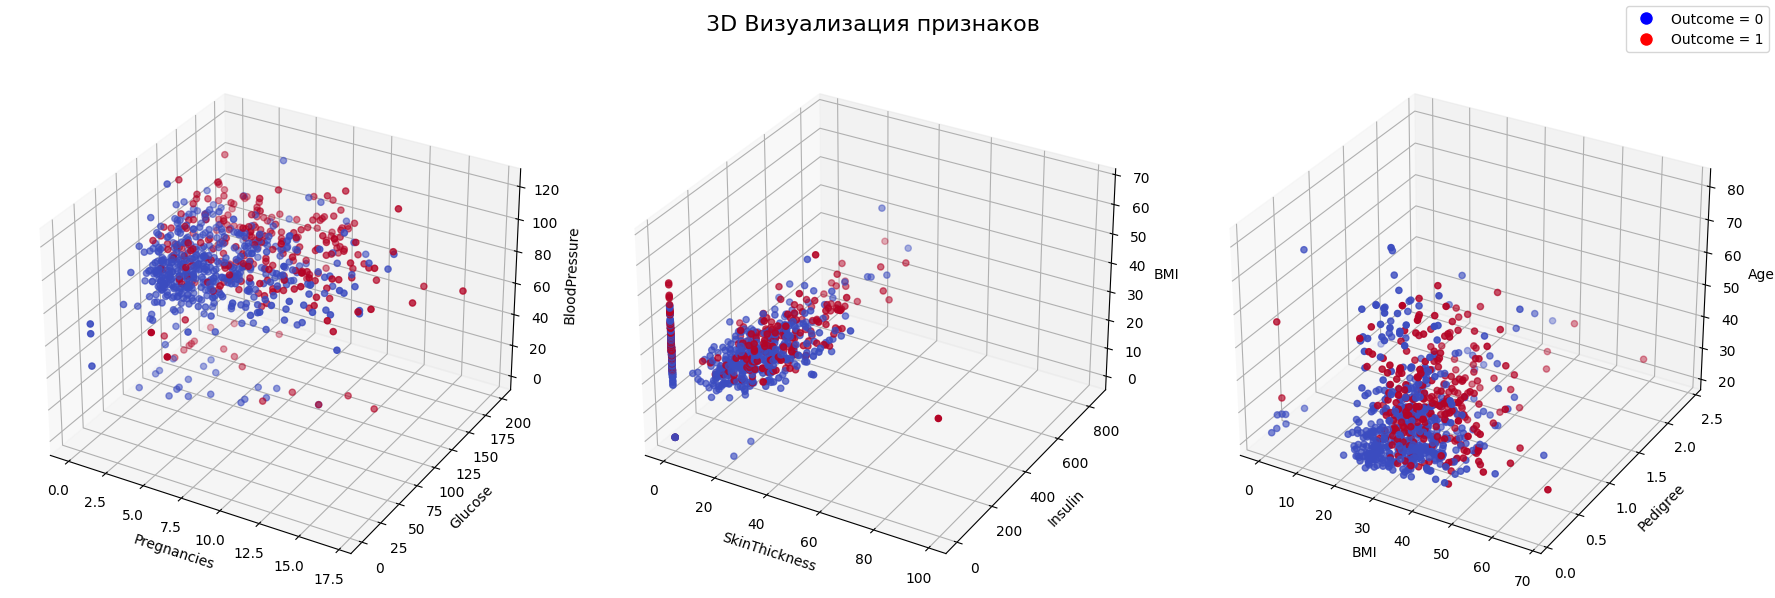

In [23]:
# Визуализация признаков в 3D
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')


outcome_0 = plt.Line2D([0], [0], marker='o', color='w', label='Outcome = 0',
                        markerfacecolor='blue', markersize=10)
outcome_1 = plt.Line2D([0], [0], marker='o', color='w', label='Outcome = 1',
                        markerfacecolor='red', markersize=10)

ax1.scatter(df["Pregnancies"], df["Glucose"], df["BloodPressure"], c=df["Outcome"], cmap="coolwarm")
ax1.set_xlabel('Pregnancies')
ax1.set_ylabel('Glucose')
ax1.set_zlabel('BloodPressure')

ax2.scatter(df["SkinThickness"], df["Insulin"], df["BMI"], c=df["Outcome"], cmap="coolwarm")
ax2.set_xlabel('SkinThickness')
ax2.set_ylabel('Insulin')
ax2.set_zlabel('BMI')

ax3.scatter(df["BMI"], df["Pedigree"], df["Age"], c=df["Outcome"], cmap="coolwarm")
ax3.set_xlabel('BMI')
ax3.set_ylabel('Pedigree')
ax3.set_zlabel('Age')

fig.suptitle('3D Визуализация признаков', fontsize=16)
fig.legend(handles=[outcome_0, outcome_1])

plt.tight_layout()
plt.show()

# Подготовка датасета
- Проверим наличие пропущенных данных - таких не обнаружено
- Заменим категориальные признаки - все признаки уже в числовом формате
- Нормируем - приводим значения в диапазон $[0, 1]$ для каждого столбца
- Разделяем на тестовую и обучающие выборки

In [24]:
# Проверка количества пропущенных значений
def  check_na(df):
    if df.isnull().values.any():
        print("В датасете есть пропущенные значения.")
    else:
        print("Пропущенных значений нет.")
    return df.isna().sum()

res = check_na(df)
res

Пропущенных значений нет.


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [25]:
# Нормировка
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

df1 = normalize(df)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [26]:
# Разделение на тестовую и обучающую выборки
def train_test_split(X, y, split=0.8):
    data_len = len(X)
    train_len = int(data_len * split)
    test_len = data_len - train_len

    indicies = [i for i in range(data_len)]
    random.shuffle(indicies)
    train_ind = indicies[:train_len]
    test_ind = indicies[train_len:]

    return X.loc[train_ind], y.loc[train_ind], X.loc[test_ind], y.loc[test_ind]

X, y = df1.drop(columns=["Outcome"]), df1["Outcome"]
X_train, y_train, X_test, y_test = train_test_split(X, y)


# Тренировка моделей
- Используем метод k-nn классификации
- Для каждого предсказываемого значения найдем k ближайших соседей и голосом большинства определим метку
- В качестве расстояния будем брать евклидово расстояние

$d(X, Y) = \sqrt{(x_1 - y_1)^2 + ... + (x_n - y_n)^2}$

## Оценка моделей
- Построим две модели с разными признаками
- Проверим модели с разными параметрами k
- Проверим качество моделей с помощью матрицы ошибок

Матрица ошибок содержит информацию о фактических и предсказанных значениях классов.

$
\begin{array}{|c|c|c|}
\hline
\hline
 & Predicted Positive & Predicted Negative \\
Actual Positive & TP & FN \\
Actual Negative​ & FP & TN \\
\hline
\end{array}
$

In [27]:
# Евклидово расстояние
def distance(x, y):
    s = 0
    for i, j in zip(x, y):
        s += (i - j) ** 2
    return np.sqrt(s)

# Определить метку новой строки данных
def do_prediction(data, data_labels, x, k):
    distances = []
    for i in range(len(data)):
        dist = distance(data.iloc[i], x)
        distances.append([i, dist])
    distances.sort(key = lambda x: x[1])
    closest_dist = distances[:k]

    s = 0
    for ind, dist in closest_dist:
        s += data_labels.iloc[ind]

    return 1 if s > k // 2 else 0

# Матрица ошибок
def get_error_matrix(y_pred, y_true):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    y_pred = list(y_pred)
    y_true = list(y_true)

    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i] and y_pred[i] == 1:
            TP += 1
        elif y_pred[i] == y_true[i] and y_pred[i] == 0:
            TN += 1
        elif y_pred[i] != y_true[i] and y_pred[i] == 1:
            FP += 1
        else:
            FN += 1

    df = pd.DataFrame([[TP, FN], [FP, TN]], columns=["Predicted Positive", "Predicted Negative"], index=["Actual Positive", "Actual Negative"])
    return df

In [17]:
def make_knn_classification(feats, k, X_train, X_test, y_train, y_test):
    X_train1 = X_train[feats]
    X_test1 = X_test[feats]

    y_pred = []

    for i in range(len(X_test1)):
        y_pred.append(do_prediction(X_train1, y_train, X_test1.iloc[i], k))

    error_mat = get_error_matrix(y_pred, y_test)
    TP = error_mat.iloc[0].iloc[0]
    TN = error_mat.iloc[1].iloc[1]
    FP = error_mat.iloc[1].iloc[0]
    FN = error_mat.iloc[0].iloc[1]

    print(f"Использовано признаков: {AMOUNT} - {feats}")
    print(f"Использован параметр {k = }")
    print(f"Accuracy: {(TP + TN) / (TP + TN + FP + FN) * 100}%")
    print(error_mat)

for AMOUNT in range(2, 5):
    for K in [3, 5, 10]:
        columns = X_train.columns
        feats = random.sample(list(columns), k=AMOUNT)

        make_knn_classification(feats, K, X_train, X_test, y_train, y_test)
        print("===============================")

Использовано признаков: 2 - ['Age', 'Pedigree']
Использован параметр k = 3
Accuracy: 64.28571428571429%
                 Predicted Positive  Predicted Negative
Actual Positive                  17                  25
Actual Negative                  30                  82
Использовано признаков: 2 - ['Insulin', 'SkinThickness']
Использован параметр k = 5
Accuracy: 68.83116883116884%
                 Predicted Positive  Predicted Negative
Actual Positive                  10                  32
Actual Negative                  16                  96
Использовано признаков: 2 - ['Age', 'BMI']
Использован параметр k = 10
Accuracy: 74.67532467532467%
                 Predicted Positive  Predicted Negative
Actual Positive                  16                  26
Actual Negative                  13                  99
Использовано признаков: 3 - ['Insulin', 'Pregnancies', 'BMI']
Использован параметр k = 3
Accuracy: 67.53246753246754%
                 Predicted Positive  Predicted Negative
Actua